In [ ]:
# selectowanie kolumn jako serie albo jako DF

# Import cars data
import pandas as pd
cars = pd.read_csv('cars.csv', index_col = 0)

# Print out country column as Pandas Series

print(cars['country']) # tak selectuję jako serię

# Print out country column as Pandas DataFrame

print(cars[['country']]) - tak selektuję jako DF

# Print out DataFrame with country and drives_right columns

print(cars[['country','drives_right']])

In [ ]:
#selectowanie ze slice'y wierszy

# Import cars data
import pandas as pd
cars = pd.read_csv('cars.csv', index_col = 0)

# Print out first 3 observations

print(cars.loc['US':'JPN'])


# Print out fourth, fifth and sixth observation

print(cars.iloc[3:6])

In [ ]:
# selectowanie pojedynczego wiersza jako DF, selectowanie różnych wierszy

# Import cars data
import pandas as pd
cars = pd.read_csv('cars.csv', index_col = 0)

# Print out observation for Japan

print(cars.loc[['JPN']])

# Print out observations for Australia and Egypt

print(cars.loc[['AUS','EG']])

In [ ]:
# wybieranie kolumny,kolumn

individuals = homelessness['individuals']

result = high_homelessness_srt[['state','indiv_per_10k']]


In [ ]:
# filtrowanie z kolumny

ind_gt_10k = homelessness[homelessness['individuals'] > 10_000]

In [ ]:
# filtrowanie z kolumny przy użyciu więcej niż jednego warunku (numpy.logical_and(_or,_not))

import numpy as np

ind_gt_10_20k = homelessness[np.logical_and(homelessness['individuals'] > 10_000, homelessness['individuals'] < 20_000)]



In [ ]:
# filtrowanie z kolumny i wykonanie na tych rekordach jakiegoś działania dla jakiejś konkretnej kolumny

sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

In [ ]:
# filtrowanie z kolumny na zasadzie isin

regions = ('South Atlantic','Mid-Atlantic')

south_mid_atlantic = homelessness[homelessness['region'].isin(regions)]

# ale można też

south_mid_atlantic = homelessness[homelessness['region'].isin(['South Atlantic','Mid-Atlantic'])]

In [ ]:
#sortowanie

homelessness_ind = homelessness.sort_values('individuals')

high_homelessness_srt = high_homelessness.sort_values(['indiv_per_10k'],ascending=False)

nobel_winners.sort_values(['year', 'prize'], ascending=[True, False])

In [ ]:
# dodawanie nowej kolumny

homelessness['total'] = homelessness['individuals'] + homelessness['family_members']


In [ ]:
# średnia, mediana

print(sales['weekly_sales'].mean())

print(sales['weekly_sales'].median())

# max, min, sum itp na tej samej zasadzie

In [ ]:
# dodawanie nowej kolumny i suma skumulowana, max skumulowany

sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()


In [ ]:
# własna funkcja użyta na danych żeby coś policzyć

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

In [ ]:
#usuwanie duplikatów (1 i więcej kolumn)

store_types = sales.drop_duplicates(subset = ['store','type'])
print(store_types.head())

In [ ]:
#usuwanie duplikatów po wybraniu konkretnej wartości

holiday_dates = sales[sales['is_holiday'] == True].drop_duplicates(subset = ['date'])


In [ ]:
#counting + udział %

unique_dogs['breed'].value_counts(opt. sort=True, opt. normalize = True)

normalize - zrobienie udziału % danej wartości w całości

In [ ]:
# groupby

dogs.groupby("color")['weight_kg'].mean()

dogs.groupby('color')['weight_kg'].agg([min,max,sum])

# grupowanie dla więcej niż 1 kolumny z działaniem na 1 wartości

dogs.groupby(['color','breed])['weight_kg'].mean()

# grupowanie dla więcej niż 1 kolumny z działaniem na więcej niż 1 wartości
              
dogs.groupby(['color','breed'])[['weight_kg','height_cm']].mean()


# wykonanie jakiegoś działania w grupowaniu i później porównanie tego z całością
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
sales_propn_by_type = sales_by_type / sum(sales_by_type)

unemp_fuel_stats = sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg([min,max,np.mean,np.median])

In [ ]:
# transponowanie tabeli

# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('name')[['height', 'weight']].transpose()

# Print fifa_transpose
print(fifa_transpose)

In [ ]:
# pivot tabeli

dogs.groupby('color')['weight_kg'].mean()
=
dogs.pivot_table(values='weight_kg',index='color')  # z defaultu pivotuje używając średniej

#można użyć innej funkcji w pivocie używając aggfunc (lub kilku funkcji)

import numpy as np
dogs.pivot_table(values='weight_kg',index='color',aggfunc=np.median)

dogs.pivot_table(values='weight_kg',index='color',aggfunc=[np.median,np.mean])

#można przekazać drugą kolumnę (pierwsza jest w index) do columns - ale w przypadku nulli będzie NaN 

dogs.pivot_table(values='weight_kg',index='color',columns='breed')

# Inny przykład:

# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year
temperatures

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c",index=['country','city'],columns='year')

# See the result
print(temp_by_country_city_vs_year)

# żeby zastąpić NaN poprzez np. 0

dogs.pivot_table(values='weight_kg',index='color',columns='breed',fill_value=0)

#dodatkowo, można dodać średnie (lub sumy itp.) dla wierszy i kolumn używamy margins = True (nie uwzględni 0 przy tej średniej)

dogs.pivot_table(values='weight_kg',index='color',columns='breed',fill_value=0, margins = True)

In [ ]:
#pivotowanie tabeli w oparciu o jakąś funkcję na danych


# Use pivot table to get all scores by name and movement
fifa_pivot_table = fifa_players.pivot_table(index='name', 
                                     columns='movement', 
                                     aggfunc= 'mean')

# Use pivot table to show the count of players by club and nationality and the total count
players_country = fifa_players.pivot_table(index='nationality', 
                                    columns='club', 
                                    values= 'id', 
                                    aggfunc='count', 
                                    margins=True)  #doda całkowitą sumę

# Print players_country
print(players_country)


# Define a pivot table to get the characteristic by nationality and club
fifa_mean = fifa_players.pivot_table(index=['nationality', 'club'], 
                                     aggfunc = 'mean')  #średnia ze wszystkich kolumn

# Print fifa_mean
print(fifa_mean)

In [ ]:
# melting tabeli - zmiana z tabeli szerokiej na długą (horyzontalnie do wertykalnie)

# Melt books_gothic using the title column as identifier 
gothic_melted = books_gothic.melt(id_vars='title')

# Print gothic_melted
print(gothic_melted)


# Melt publisher column using title and authors as identifiers
publisher_melted = books_gothic.melt(id_vars=['title', 'authors'], 
                                     value_vars='publisher')

# Print publisher_melted
print(publisher_melted)



# Melt rating and rating_count columns using the title as identifier
rating_melted = books_gothic.melt(id_vars='title', 
                                  value_vars=['rating', 'rating_count'])

# Print rating_melted
print(rating_melted)


# Melt rating and rating_count columns using title and authors as identifier
books_melted = books_gothic.melt(id_vars=['title','authors'], 
                                 value_vars= ['rating','rating_count'])

# Print books_melted
print(books_melted)



# Melt the rating and rating_count using title, authors and publisher as identifiers
books_ratings = books_gothic.melt(id_vars = ['title','authors','publisher'], 
                                  value_vars = ['rating','rating_count'])

# Print books_ratings
print(books_ratings)






# Assign the name feature to the new variable column
# Assign the name number to the new column containing the values
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'], 
                                  var_name='feature', 
                                  value_name= 'number')

# Print books_ratings
print(books_ratings)


### wide to long

melting na ogół wystarczy, ale jeżeli kolumny będą się wyróżniać sufiksami (np. 'rok_2019','rok_2020') to można zrobić jedną kolumnę rok a w inną kolumnę wrzucić (już pionowo) to 2019 i 2020


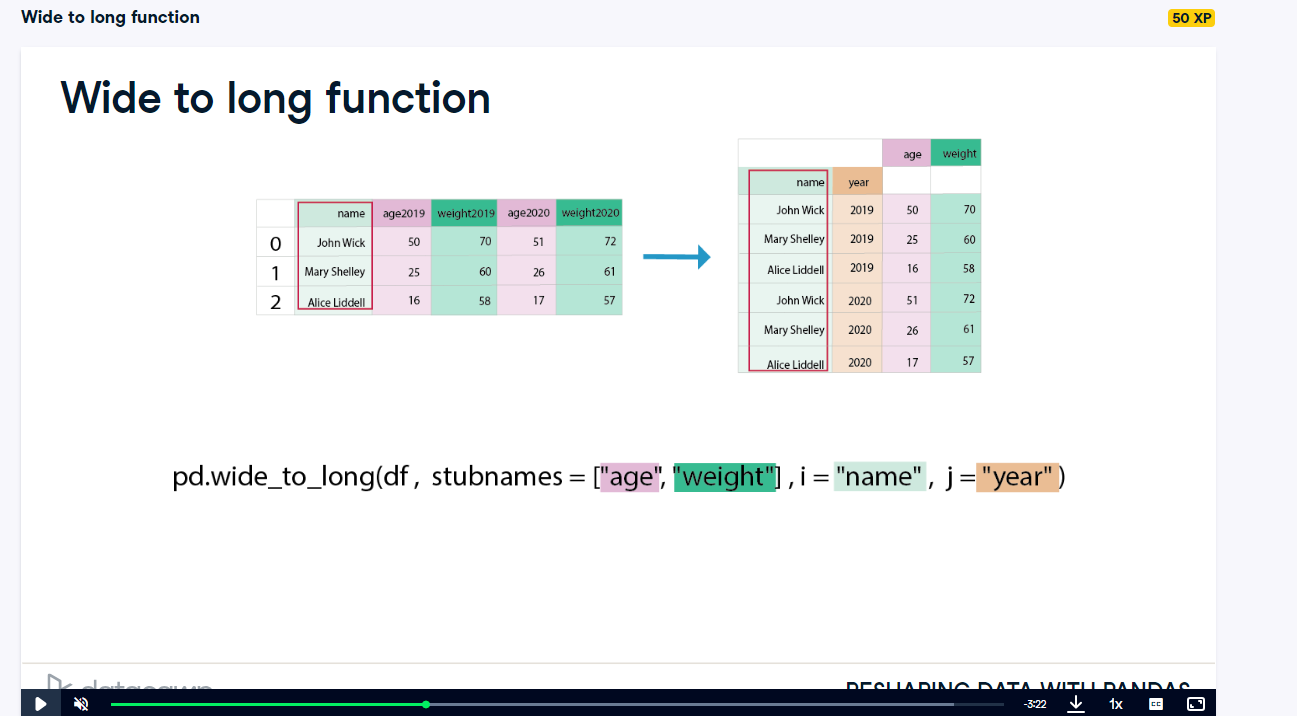

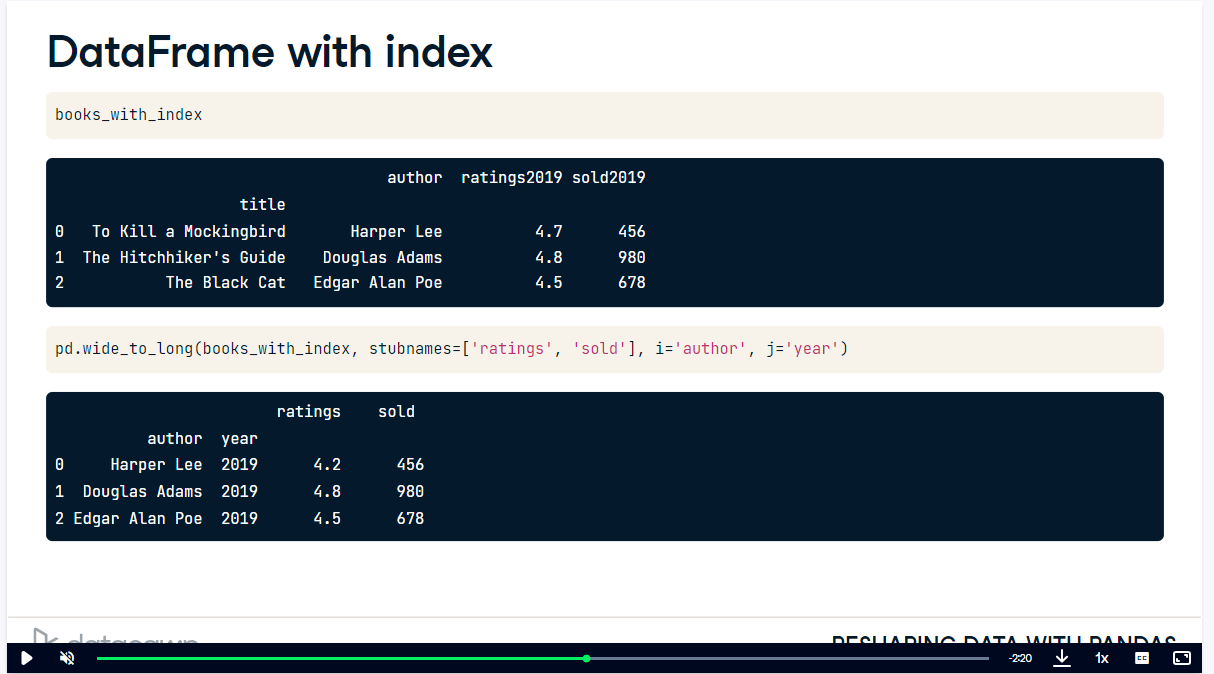


In [22]:
# # Reshape wide to long using title as index and version as new name, and extracting isbn prefix 



#                title              authors         isbn13      isbn10  prefix13  prefix10
# 0   The Great Gatsby  F. Scott Fitzgerald  9780060098919  1572702567       978         1
# 1  The Short Stories     Ernest Hemingway  9780684837864   684837862       978         0
# 2  To the Lighthouse       Virginia Woolf  9780156030472   156030470       978         0


# golden_age

# # Reshape wide to long using title as index and version as new name, and extracting isbn prefix 
# isbn_long = pd.wide_to_long(golden_age, 
#                     stubnames= ['isbn','prefix'],
#                     i='title', 
#                     j='version')

# # Print isbn_long
# print(isbn_long)

#                                        authors           isbn  prefix
# title             version                                            
# The Great Gatsby  13       F. Scott Fitzgerald  9780060098919     978
# The Short Stories 13          Ernest Hemingway  9780684837864     978
# To the Lighthouse 13            Virginia Woolf  9780156030472     978
# The Great Gatsby  10       F. Scott Fitzgerald     1572702567       1
# The Short Stories 10          Ernest Hemingway      684837862       0
# To the Lighthouse 10            Virginia Woolf      156030470       0




# # Reshape wide to long using title and authors as index and version as new name, and prefix and isbn as wide column prefixes
# all_long = pd.wide_to_long(golden_age, 
#                    stubnames = ['prefix','isbn'], # kolumny jakie mają zostać rozbite na swoje poszczególne wersje - budowa prefix123 - spodziewa się numeru
#                    i = ['title','authors'], # kolumny które mają być indeksami
#                    j = 'version') # jak się ma nazywać kolumna która zostanie utworzona by rozróżniać między są stubnames

# # Print all_long
# print(all_long)

#                                                prefix           isbn
# title             authors             version                       
# The Great Gatsby  F. Scott Fitzgerald 13          978  9780060098919
#                                       10            1     1572702567
# The Short Stories Ernest Hemingway    13          978  9780684837864
#                                       10            0      684837862
# To the Lighthouse Virginia Woolf      13          978  9780156030472
#                                       10            0      156030470



# zrób dwa dataframe'y, połącz je ze sobą

import pandas as pd

books_brown = pd.DataFrame([{'title':'The Da Vinci Code'
                             ,'authors':'Dan Brown'
                             ,'language_code':'0'
                             ,'language_name':'english'
                             ,'publisher_code':12
                             ,'publisher_name':'Random House'}]
                          )



next_rows = pd.DataFrame({
                        'title':['Angels & Demons','La fortaleza digital']
                         ,'authors':['Dan Brown','Dan Brown']
                         ,'language_code':[0,84]
                         ,'language_name':['English','Spanish']
                         ,'publisher_code':[34,43]
                         ,'publisher_name':['Pocket Books','Umbriel']
                        })


books_brown = pd.concat([books_brown,next_rows]).reset_index()

books_brown

# zmień strukturę z szerokiej na długą, zachowując autora i tytuł jako indeks, rozbij język i wydawcę po ich sufiksach, nową kolumnę nazwij code
# określ jaki jest separator w nazwie kolumny i podaj informację że sufiks będzie stringiem a nie liczbą
the_code_long = pd.wide_to_long(books_brown, 
                                stubnames=['language', 'publisher'], 
                                i=['authors', 'title'], 
                                j='code', 
                                sep='_', 
                                suffix= '\w+')

# Print the_code_long
the_code_long

index language     publisher
authors   title                code                              
Dan Brown The Da Vinci Code    code      0        0            12
                               name      0  english  Random House
          Angels & Demons      code      0        0            34
                               name      0  English  Pocket Books
          La fortaleza digital code      1       84            43
                               name      1  Spanish       Umbriel

In [ ]:
# robienie z jednej z kolumn indeksu dla tabelki

dogs_ind = dogs.set_index('name') # co ważne - tak z automatu nie zajdzie tutaj żadna agregacja, wartości w indeksie mogą się duplikować

#resetowanie indeksu
dogs_ind.reset_index()

# usuwanie kolumny indeksu w ogole (zniknie ta kolumna z danych)
dogs_ind.reset_index(drop=True)


#indeksem może być więcej niż jedna kolumna (indeksy hierarchiczne)

dogs_ind2 = dogs.set_index(['name','breed'])


In [ ]:
#filtrowanie po indeksie - tablica

dogs_ind.loc[['Bella','Stella']]

# filtrowanie po indeksach hierarchicznych - tu już są krotki w tablicach

dogs_ind2.loc[[('Bella','Labrador'),('Stella','Doberman')]]

# sortowanie po indeksie

dogs_ind2.sort_index()

dogs_ind2.sort_index(level=['breed','name'], ascending=[True,False])

In [ ]:
# Wybieranie wierszy i kolumn po stringach (.loc)

# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India","Hyderabad"):('Iraq','Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):('Iraq','Baghdad'),"date":"avg_temp_c"])

In [ ]:
# Wybieranie wierszy i kolumn po indeksach wierszy i indeksach kolumn (.iloc)

# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,[1]])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,[2,3]])

# Use slicing in both directions at once
print(temperatures.iloc[:5,[2,3]])

In [ ]:
# Boolean filtering na serii

# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')



# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

In [ ]:
# tworzenie histogramów, nakładanie dwóch różnych na siebie i dodawanie legendy


# Histogram of conventional avg_price 
avocados[avocados['type']=='conventional']['avg_price'].hist()

# Histogram of organic avg_price
avocados[avocados['type']=='organic']['avg_price'].hist()

# Add a legend
plt.legend(['conventional','organic'])

# Show the plot
plt.show()



----- zmiana ustawień histogramu

# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(bins = 20, alpha=0.5)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(bins = 20, alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

In [ ]:
# wykres kolumnowy

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].agg(sum)


# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')


# Show the plot
plt.show()

In [ ]:
# wykres liniowy

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

avocados

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].agg(sum)
nb_sold_by_date

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

In [ ]:
# wykres rozsiania - scatter

# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(kind='scatter',x='nb_sold',y='avg_price', title = 'Number of avocados sold vs. average price')

# Show the plot
plt.show()

In [ ]:
#puste wartości 'na'

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values - sprawdzenie dla każdej wartości czy jest ona pusta
print(avocados_2016.isna())

# Check each column for missing values - sprawdzenie dla każdej kolumny- czy zawiera ona minimum jedną pustą wartość
print(avocados_2016.isna().any())

avocados_2016.isna().sum()   # sprawdzenie dla każdej kolumny ile jest w niej pustych wartości

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar') # przedstawienie ilości pustych wartości na wykresie kolumnowym

# zamienianie pustych wartości na coś innego (np. 0)

avocados_filled = avocados_2016.fillna(0)

In [2]:
# Tworzenie dataframe'u
import pandas as pd

# metoda z listy słowników # wsadzamy wiersz po wierszu

avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)




#metoda ze słownika list: () # wsadzamy kolumna po kolumni

# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)



         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [8]:
#wsadzając słownik ze słownikami do dataframe'u mówimy DF jak chcemy by nazywały się wiersze

# Dictionary of dictionaries
import pandas as pd

europe = { 'spain': { 'capital':'madrid', 'population':46.77 },
           'france': { 'capital':'paris', 'population':66.03 },
           'germany': { 'capital':'berlin', 'population':80.62 },
           'norway': { 'capital':'oslo', 'population':5.084 } }

europe_pd = pd.DataFrame(europe)

print(europe_pd)

print(europe_pd.transpose())



             spain france germany norway
capital     madrid  paris  berlin   oslo
population   46.77  66.03   80.62  5.084
        capital population
spain    madrid      46.77
france    paris      66.03
germany  berlin      80.62
norway     oslo      5.084


In [ ]:
# Tworzenie DF i nadawanie indexu wierszom ze zmiennej

import pandas as pd

# Build cars DataFrame
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
cars_dict = { 'country':names, 'drives_right':dr, 'cars_per_cap':cpc }
cars = pd.DataFrame(cars_dict)
print(cars)

# Definition of row_labels
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars

cars.index = row_labels

# Print cars again

print(cars)

In [ ]:
# Odczyt i zapis CSV

# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping)

# odczyt csv z nadaniem od razu indexu

cars = pd.read_csv('cars.csv', index_col = [0]) # pierwsza kolumna z csv ma być indexem


# Odczyt i następnie jakieś działania, czyli np. dodawanie kolumny obliczeniowej:

# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)


# ZAPIS do csv

# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k',ascending = False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv('airline_totals_sorted.csv')

In [ ]:
# usuwanie wierszy
# axis = 0 - wiersze, = 1 - kolumny
# Drop the fifth row to delete all repeated rows
fifa_no_rep = fifa_players.drop(4, axis=0)

